In [32]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import pandas as pd
import time

# Initialize geolocator with an increased timeout
geolocator = Nominatim(user_agent="tsp-geolocator", timeout=10)

# Expanded list of major Indian cities
cities = [ 
    "Delhi", "Mumbai", "Bangalore", "Hyderabad", "Kolkata", "Chennai", "Port Blair", "Pune", "Ahmedabad",
    "Jaipur", "Lucknow", "Surat", "Kanpur", "Nagpur", "Visakhapatnam", "Bhopal", "Patna",
    "Vadodara", "Agra", "Nashik", "Vijayawada", "Coimbatore", "Indore", "Thane", "Ludhiana",
    "Madurai", "Bhubaneswar", "Amritsar", "Varanasi", "Raipur", "Aurangabad", "Ranchi",
    "Jodhpur", "Guwahati", "Chandigarh", "Mysore", "Gwalior", "Noida", "Faridabad", "Ghaziabad",
    "Meerut", "Rajkot", "Dhanbad", "Jalandhar", "Kota", "Bareilly", "Bikaner", "Agartala",
    "Jammu", "Udaipur", "Dehradun", "Allahabad", "Srinagar", "Mangalore", "Shillong", "Gangtok"
]

# Dictionary to store city coordinates
city_coordinates = {}

# Function to get coordinates with retry logic
def get_coordinates(city, retries=3):
    for attempt in range(retries):
        try:
            location = geolocator.geocode(city + ", India")
            if location:
                return (location.latitude, location.longitude)
            else:
                print(f"Coordinates for {city} not found.")
                return None
        except GeocoderTimedOut:
            print(f"Geocoder timed out for {city}, attempt {attempt + 1}/{retries}")
            time.sleep(2)  # Wait before retrying
    return None

# Get coordinates for each city
for city in cities:
    coordinates = get_coordinates(city)
    if coordinates:
        city_coordinates[city] = coordinates
        print(f"Coordinates for {city}: {coordinates}")
    else:
        print(f"Skipping {city} due to repeated timeout.")

# Convert to a DataFrame for easy handling
city_df = pd.DataFrame.from_dict(city_coordinates, orient='index', columns=['Latitude', 'Longitude'])
print("City Coordinates:")
print(city_df)

# Save city coordinates to a CSV file
city_df.to_csv('indian_cities_coordinates.csv', index_label='City')

# Confirm completion
print("Dataset preparation complete. Saved to 'indian_cities_coordinates.csv'.")

Coordinates for Delhi: (28.6273928, 77.1716954)
Coordinates for Mumbai: (19.054999, 72.8692035)
Coordinates for Bangalore: (12.98815675, 77.62260003796)
Coordinates for Hyderabad: (17.360589, 78.4740613)
Coordinates for Kolkata: (22.5726459, 88.3638953)
Coordinates for Chennai: (13.0836939, 80.270186)
Coordinates for Port Blair: (11.6645348, 92.7390448)
Coordinates for Pune: (18.5213738, 73.8545071)
Coordinates for Ahmedabad: (23.0215374, 72.5800568)
Coordinates for Jaipur: (26.9154576, 75.8189817)
Coordinates for Lucknow: (26.8381, 80.9346001)
Coordinates for Surat: (21.2094892, 72.8317058)
Coordinates for Kanpur: (26.4609135, 80.3217588)
Coordinates for Nagpur: (21.1498134, 79.0820556)
Coordinates for Visakhapatnam: (17.6935526, 83.2921297)
Coordinates for Bhopal: (23.2584857, 77.401989)
Coordinates for Patna: (25.6093239, 85.1235252)
Coordinates for Vadodara: (22.2973142, 73.1942567)
Coordinates for Agra: (27.1752554, 78.0098161)
Coordinates for Nashik: (20.0112475, 73.7902364)
Coor

In [33]:
from geopy.distance import geodesic
#haversine distance
# Function to calculate distance matrix
def calculate_distance_matrix(city_df):
    cities = city_df.index
    num_cities = len(cities)
    distance_matrix = pd.DataFrame(index=cities, columns=cities)
    
    for city1 in cities:
        for city2 in cities:
            if city1 == city2:
                distance_matrix.loc[city1, city2] = 0
            else:
                coord1 = (city_df.loc[city1, 'Latitude'], city_df.loc[city1, 'Longitude'])
                coord2 = (city_df.loc[city2, 'Latitude'], city_df.loc[city2, 'Longitude'])
                distance_matrix.loc[city1, city2] = geodesic(coord1, coord2).kilometers
    
    return distance_matrix

# Generate and save the distance matrix
distance_matrix = calculate_distance_matrix(city_df)
distance_matrix.to_csv('distance_matrix.csv')

In [34]:
import numpy as np

# List of cities from the distance matrix (excluding the unnamed index column)
cities = distance_matrix.columns[1:].tolist()

# Create a function to generate the initial population with city names and indices
def create_initial_population(population_size, city_names):
    population = []
    for _ in range(population_size):
        # Random permutation of city indices
        route_indices = np.random.permutation(len(city_names)).tolist()
        # Convert the route indices to actual city names and their corresponding indices
        route = [(city_names[i], i) for i in route_indices]
        population.append(route)
    return population

# Parameters
population_size = 20  # Number of routes in the initial population
num_cities = len(cities)
 
# Generate the initial population with city names and indices
initial_population = create_initial_population(population_size, cities)

# Display the first few routes in the population (with city names and their indices)
for i, route in enumerate(initial_population[:20]):
    print(f"Route {i+1}: ", end="")
    for city, index in route:
        print(f"({city}, {index})", end=" -> ")
    print()  # For a new line after each route

Route 1: (Thane, 22) -> (Mangalore, 52) -> (Mysore, 34) -> (Hyderabad, 2) -> (Aurangabad, 29) -> (Nagpur, 12) -> (Bhopal, 14) -> (Noida, 36) -> (Agartala, 46) -> (Coimbatore, 20) -> (Kanpur, 11) -> (Kolkata, 3) -> (Bareilly, 44) -> (Madurai, 24) -> (Chandigarh, 33) -> (Bhubaneswar, 25) -> (Chennai, 4) -> (Jalandhar, 42) -> (Lucknow, 9) -> (Gangtok, 54) -> (Pune, 6) -> (Varanasi, 27) -> (Jaipur, 8) -> (Mumbai, 0) -> (Nashik, 18) -> (Udaipur, 48) -> (Jodhpur, 31) -> (Bikaner, 45) -> (Ludhiana, 23) -> (Bangalore, 1) -> (Port Blair, 5) -> (Amritsar, 26) -> (Ghaziabad, 38) -> (Faridabad, 37) -> (Ranchi, 30) -> (Agra, 17) -> (Vijayawada, 19) -> (Patna, 15) -> (Meerut, 39) -> (Rajkot, 40) -> (Surat, 10) -> (Guwahati, 32) -> (Kota, 43) -> (Visakhapatnam, 13) -> (Dehradun, 49) -> (Vadodara, 16) -> (Gwalior, 35) -> (Allahabad, 50) -> (Dhanbad, 41) -> (Raipur, 28) -> (Indore, 21) -> (Shillong, 53) -> (Ahmedabad, 7) -> (Jammu, 47) -> (Srinagar, 51) -> 
Route 2: (Nagpur, 12) -> (Agartala, 46) -> (A

In [35]:
# Convert the distance matrix to a numpy array for easier indexing
distance_array = distance_matrix.iloc[:, 1:].values  # Exclude the first column with city names

# Fitness function: Calculate the total distance of the route and return the inverse as fitness
def calculate_route_distance(route, distance_matrix):
    total_distance = 0
    num_cities = len(route)
    for i in range(num_cities):
        # Extract the indices from the route tuples
        current_city_index = route[i][1]
        next_city_index = route[(i + 1) % num_cities][1]
        # Distance from the current city to the next, looping back to the start at the end
        total_distance += distance_matrix[current_city_index, next_city_index]
    return total_distance  

def calculate_fitness(route, distance_matrix):
    total_distance = calculate_route_distance(route, distance_matrix)
    return 1 / total_distance if total_distance > 0 else float('inf')

# Test the fitness function on the first individual in the population
test_route = initial_population[0]
fitness_value = calculate_fitness(test_route, distance_array)
# Display the route and its fitness value
print("Route:", test_route)
print("Fitness value:", fitness_value)

# Print All 20 Routes with their Fitness Values

# Calculate and display the fitness values for all routes in the initial population

for i, route in enumerate(initial_population):
    fitness_value = calculate_fitness(route, distance_array)
    print(f"Route {i+1}: {route} -> Fitness: {fitness_value:.6f}")

Route: [('Thane', 22), ('Mangalore', 52), ('Mysore', 34), ('Hyderabad', 2), ('Aurangabad', 29), ('Nagpur', 12), ('Bhopal', 14), ('Noida', 36), ('Agartala', 46), ('Coimbatore', 20), ('Kanpur', 11), ('Kolkata', 3), ('Bareilly', 44), ('Madurai', 24), ('Chandigarh', 33), ('Bhubaneswar', 25), ('Chennai', 4), ('Jalandhar', 42), ('Lucknow', 9), ('Gangtok', 54), ('Pune', 6), ('Varanasi', 27), ('Jaipur', 8), ('Mumbai', 0), ('Nashik', 18), ('Udaipur', 48), ('Jodhpur', 31), ('Bikaner', 45), ('Ludhiana', 23), ('Bangalore', 1), ('Port Blair', 5), ('Amritsar', 26), ('Ghaziabad', 38), ('Faridabad', 37), ('Ranchi', 30), ('Agra', 17), ('Vijayawada', 19), ('Patna', 15), ('Meerut', 39), ('Rajkot', 40), ('Surat', 10), ('Guwahati', 32), ('Kota', 43), ('Visakhapatnam', 13), ('Dehradun', 49), ('Vadodara', 16), ('Gwalior', 35), ('Allahabad', 50), ('Dhanbad', 41), ('Raipur', 28), ('Indore', 21), ('Shillong', 53), ('Ahmedabad', 7), ('Jammu', 47), ('Srinagar', 51)]
Fitness value: 1.610464140314728e-05
Route 1: [

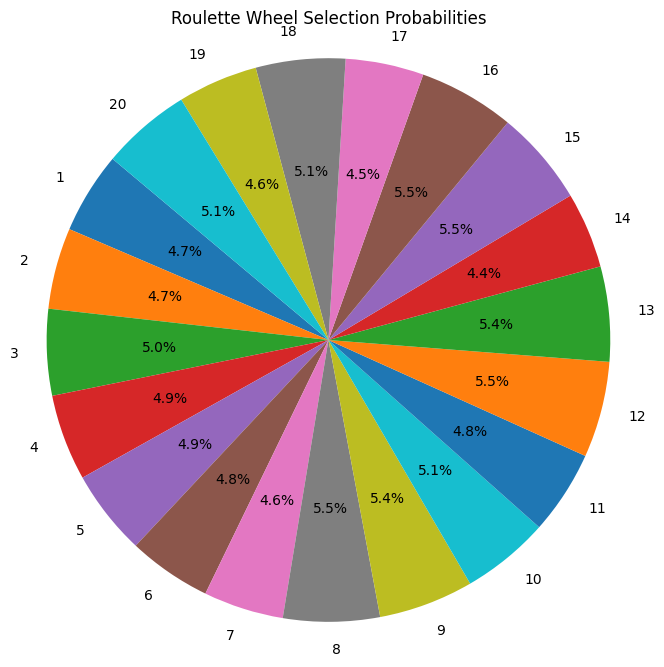

Selected Parent 1: [('Pune', 6), ('Ludhiana', 23), ('Meerut', 39), ('Dhanbad', 41), ('Aurangabad', 29), ('Noida', 36), ('Chennai', 4), ('Kota', 43), ('Rajkot', 40), ('Bhubaneswar', 25), ('Dehradun', 49), ('Varanasi', 27), ('Faridabad', 37), ('Nagpur', 12), ('Allahabad', 50), ('Indore', 21), ('Jaipur', 8), ('Gwalior', 35), ('Amritsar', 26), ('Bikaner', 45), ('Kanpur', 11), ('Chandigarh', 33), ('Gangtok', 54), ('Bareilly', 44), ('Bhopal', 14), ('Ahmedabad', 7), ('Kolkata', 3), ('Jalandhar', 42), ('Patna', 15), ('Mumbai', 0), ('Nashik', 18), ('Agra', 17), ('Guwahati', 32), ('Lucknow', 9), ('Shillong', 53), ('Vijayawada', 19), ('Madurai', 24), ('Mangalore', 52), ('Ranchi', 30), ('Udaipur', 48), ('Raipur', 28), ('Bangalore', 1), ('Srinagar', 51), ('Jodhpur', 31), ('Thane', 22), ('Visakhapatnam', 13), ('Port Blair', 5), ('Surat', 10), ('Coimbatore', 20), ('Agartala', 46), ('Vadodara', 16), ('Jammu', 47), ('Ghaziabad', 38), ('Hyderabad', 2), ('Mysore', 34)]
Selected Parent 2: [('Mysore', 34),

In [36]:
import numpy as np

# Roulette Wheel Selection
def roulette_wheel_selection(population, fitness_values, num_parents):
    # Scale fitness values with respect to the maximum fitness
    max_fitness = max(fitness_values)
    scaled_fitness = [f / max_fitness for f in fitness_values]
    
    # Calculate cumulative probabilities
    cumulative_probs = np.cumsum(scaled_fitness) / sum(scaled_fitness)
    
    # Select parents based on cumulative probabilities
    parents = []
    for _ in range(num_parents):
        rand_val = np.random.rand()  # Random value for selection
        for i, cumulative_prob in enumerate(cumulative_probs):
            if rand_val <= cumulative_prob:
                parents.append(population[i])
                break
    return parents

# Example usage of selection with fitness values for the initial population
fitness_values = [calculate_fitness(route, distance_array) for route in initial_population]
selected_parents = roulette_wheel_selection(initial_population, fitness_values, num_parents=10)


# Visualize Roulette Wheel Selection in a Pie Chart

import matplotlib.pyplot as plt

# Function to plot the selection probabilities in a pie chart
def plot_selection_probs(selection_probs):
    plt.figure(figsize=(8, 8))
    plt.pie(selection_probs, labels=[str(i) for i in range(1, len(selection_probs) + 1)], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("Roulette Wheel Selection Probabilities")
    plt.show()


# Test the roulette wheel selection with the initial population
selection_probs = np.array(fitness_values) / sum(fitness_values)
plot_selection_probs(selection_probs)

    

# Display first few selected parents for inspection
for i, parent in enumerate(selected_parents[:10]):
    print(f"Selected Parent {i + 1}: {parent}")

In [37]:
import random

# Order Crossover (OX) for permutation-based crossover
def order_crossover(parent1, parent2):
    # Length of the route (number of cities)
    length = len(parent1)
    
    # Randomly select two crossover points
    start, end = sorted(random.sample(range(length), 2))
    
    # Initialize offspring with None
    offspring = [None] * length
    
    # Copy the segment from parent1 into the offspring
    offspring[start:end + 1] = parent1[start:end + 1]
    
    # Fill remaining positions with cities from parent2 in order
    pos = (end + 1) % length  # Start filling from the next position after the end segment
    for city in parent2:
        if city not in offspring:
            offspring[pos] = city
            pos = (pos + 1) % length
    
    return offspring

# Apply crossover with a given probability to generate offspring population
def crossover_population(parents, crossover_prob=0.6):
    offspring = []
    num_parents = len(parents)
    
    # Handle cases where there's an odd number of parents
    for i in range(0, num_parents - 1, 2):  # Take pairs of parents
        parent1, parent2 = parents[i], parents[i + 1]
        if random.random() < crossover_prob:
            # Perform crossover
            child1 = order_crossover(parent1, parent2)
            child2 = order_crossover(parent2, parent1)
            offspring.extend([child1, child2])
        else:
            # No crossover; pass parents directly as offspring
            offspring.extend([parent1, parent2])
            # If there is an odd parent left (in case of an odd-length population), add it directly to offspring
    if num_parents % 2 != 0:
        offspring.append(parents[-1])
    
    return offspring

# Generate offspring using crossover on selected parents
offspring_population = crossover_population(selected_parents)

# Display first few offspring for inspection
for i, child in enumerate(offspring_population[:3]):
    print(f"Offspring {i+1}: {child}")

Offspring 1: [('Dhanbad', 41), ('Hyderabad', 2), ('Faridabad', 37), ('Ludhiana', 23), ('Vadodara', 16), ('Bikaner', 45), ('Coimbatore', 20), ('Meerut', 39), ('Agartala', 46), ('Aurangabad', 29), ('Port Blair', 5), ('Dehradun', 49), ('Allahabad', 50), ('Thane', 22), ('Rajkot', 40), ('Bhubaneswar', 25), ('Jaipur', 8), ('Jammu', 47), ('Noida', 36), ('Surat', 10), ('Kanpur', 11), ('Chandigarh', 33), ('Gangtok', 54), ('Bareilly', 44), ('Bhopal', 14), ('Ahmedabad', 7), ('Kolkata', 3), ('Jalandhar', 42), ('Patna', 15), ('Mumbai', 0), ('Nashik', 18), ('Agra', 17), ('Guwahati', 32), ('Lucknow', 9), ('Shillong', 53), ('Vijayawada', 19), ('Madurai', 24), ('Mangalore', 52), ('Ranchi', 30), ('Udaipur', 48), ('Raipur', 28), ('Bangalore', 1), ('Srinagar', 51), ('Jodhpur', 31), ('Mysore', 34), ('Indore', 21), ('Visakhapatnam', 13), ('Ghaziabad', 38), ('Gwalior', 35), ('Amritsar', 26), ('Pune', 6), ('Nagpur', 12), ('Kota', 43), ('Chennai', 4), ('Varanasi', 27)]
Offspring 2: [('Bhopal', 14), ('Ahmedabad

In [38]:
# Mutation function: Swaps two cities in a route based on mutation probability
def mutate_route(route, mutation_prob=0.1):
    mutated_route = route[:]  # Make a copy of the route to avoid modifying the original
    if random.random() < mutation_prob:
        # Randomly select two indices to swap
        idx1, idx2 = random.sample(range(len(route)), 2)
        # Swap the cities at the two indices
        mutated_route[idx1], mutated_route[idx2] = mutated_route[idx2], mutated_route[idx1]
    return mutated_route

# Apply mutation to the entire population
def mutate_population(population, mutation_prob=0.1):
    mutated_population = []
    for i, route in enumerate(population):
        mutated_route = mutate_route(route, mutation_prob)
        mutated_population.append(mutated_route)
        # Display the mutation for inspection
        # print(f"Original Route {i+1}: {route}")
        # print(f"Mutated Route {i+1}: {mutated_route}\n")
    return mutated_population

# Apply mutation to the offspring population
mutated_population = mutate_population(offspring_population, mutation_prob=0.2)

# # Display first few mutated individuals for inspection
# for i, mutated_route in enumerate(mutated_population[:3]):
#     print(f"Mutated Offspring {i+1}: {mutated_route}")

In [39]:
import numpy as np

# Assuming distance_matrix and other necessary variables are already defined

# Genetic Algorithm parameters
num_generations = 100000
population_size = 20
num_parents = 10  # Number of parents selected per generation
mutation_prob = 0.2  # Mutation probability

# Initialize the population
population = create_initial_population(population_size, cities)

# To store the best route and distance for each generation
best_route_per_generation = []
best_distance_per_generation = []

# Run the Genetic Algorithm
for generation in range(num_generations):
    # Step 1: Calculate fitness for each route in the population
    fitness_values = [calculate_fitness(route, distance_array) for route in population]
    
    # Track the best solution in this generation
    best_index = np.argmax(fitness_values)
    best_route = population[best_index]
    best_distance = 1 / fitness_values[best_index] if fitness_values[best_index] > 0 else float('inf')
    
    # Record best route and distance for this generation
    best_route_per_generation.append(best_route)
    best_distance_per_generation.append(best_distance)
    
    # Displaying progress in each generation (optional)
    print(f"Generation {generation + 1}/{num_generations}: Best Distance = {best_distance:.2f}")
    
    # Step 2: Selection - Select parents based on fitness
    parents = roulette_wheel_selection(population, fitness_values, num_parents)
    
    # Step 3: Crossover - Generate offspring through crossover of parents
    offspring_population = crossover_population(parents)

    # Step 4: Mutation - Mutate the offspring population
    mutated_population = mutate_population(offspring_population, mutation_prob)
    
    # Step 5: Replace the old population with the new mutated population
    population = mutated_population

# Get the best solution across all generations
best_overall_index = np.argmin(best_distance_per_generation)
best_overall_route = best_route_per_generation[best_overall_index]
best_overall_distance = best_distance_per_generation[best_overall_index]

# Display the best solution found during the GA process
print("\nBest Overall Route (from all generations):")
print(best_overall_route)
print(f"Best Overall Distance: {best_overall_distance:.2f}")

Generation 1/100000: Best Distance = 53989.11
Generation 2/100000: Best Distance = 56195.18
Generation 3/100000: Best Distance = 55474.79
Generation 4/100000: Best Distance = 56285.00
Generation 5/100000: Best Distance = 52838.99
Generation 6/100000: Best Distance = 51758.63
Generation 7/100000: Best Distance = 47402.99
Generation 8/100000: Best Distance = 47527.28
Generation 9/100000: Best Distance = 47527.28
Generation 10/100000: Best Distance = 48044.71
Generation 11/100000: Best Distance = 47213.58
Generation 12/100000: Best Distance = 47434.55
Generation 13/100000: Best Distance = 45308.79
Generation 14/100000: Best Distance = 49027.94
Generation 15/100000: Best Distance = 45622.03
Generation 16/100000: Best Distance = 49177.24
Generation 17/100000: Best Distance = 49202.91
Generation 18/100000: Best Distance = 49202.91
Generation 19/100000: Best Distance = 48064.95
Generation 20/100000: Best Distance = 48740.25
Generation 21/100000: Best Distance = 48740.25
Generation 22/100000: 

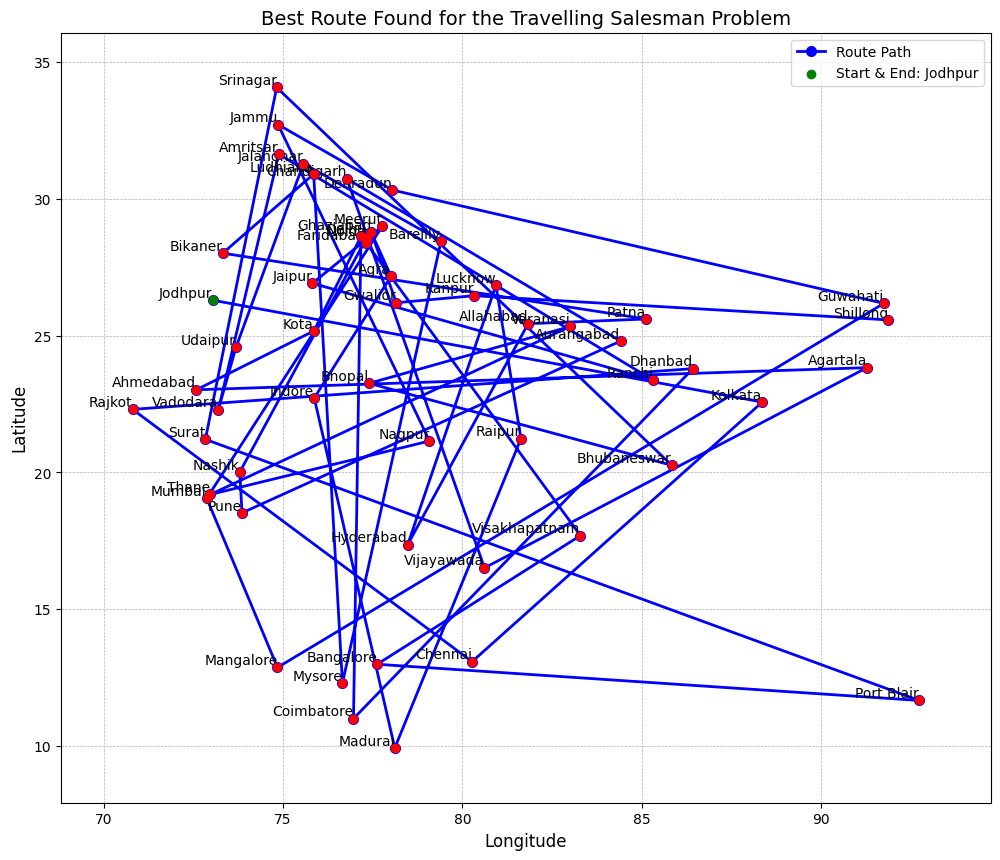

In [40]:
from matplotlib import pyplot as plt

# Ensure city names, latitudes, and longitudes are retrieved properly
city_df = city_df.reset_index().rename(columns={'index': 'City'})  # Keep city names properly
city_names = city_df['City'].values  
latitudes = city_df['Latitude'].values
longitudes = city_df['Longitude'].values

# Retrieve the best route's coordinates (ensure correct indexing)
best_route_coords = [(longitudes[city[1]], latitudes[city[1]]) for city in best_overall_route]

# Separate coordinates for plotting
x_coords, y_coords = zip(*best_route_coords)

# Plot the route
plt.figure(figsize=(12, 10))
plt.plot(x_coords, y_coords, marker='o', color='b', linestyle='-', linewidth=2, markersize=7, label='Route Path')
plt.scatter(x_coords, y_coords, color='red', zorder=5)  # Mark cities in red
plt.title('Best Route Found for the Travelling Salesman Problem', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

annotated_cities = set()  # Avoid duplicates
for i, city in enumerate(best_overall_route):
    city_index = city[1]  # Extract index from tuple
    if city_index not in annotated_cities:
        plt.text(x_coords[i], y_coords[i], city_names[city_index], fontsize=10, ha='right', va='bottom', color='black')
        annotated_cities.add(city_index)

# Highlight the start and end points (same city, so only mark it once)
start_city = best_overall_route[0][1]
plt.scatter(x_coords[0], y_coords[0], color='green', zorder=6, label=f"Start & End: {city_names[start_city]}")

# Expand x/y limits to prevent clipping of distant cities like Port Blair
plt.xlim(min(longitudes) - 2, max(longitudes) + 2)
plt.ylim(min(latitudes) - 2, max(latitudes) + 2)

# Add a legend
plt.legend(loc='best')

# Display the plot
plt.show()


In [41]:
import networkx as nx

# Load precomputed distance matrix
distance_matrix = pd.read_csv("distance_matrix.csv", index_col=0)

# Convert distance matrix to a graph
G = nx.Graph()
cities = distance_matrix.index

for city1 in cities:
    for city2 in cities:
        if city1 != city2:  # Avoid self-loops
            G.add_edge(city1, city2, weight=distance_matrix.loc[city1, city2])

# Function to find the shortest path
def find_shortest_path(source, destination):
    if source not in cities or destination not in cities:
        return f"Invalid city names! Choose from: {list(cities)}", None
    
    try:
        shortest_path = nx.shortest_path(G, source=source, target=destination, weight='weight')
        path_distance = nx.shortest_path_length(G, source=source, target=destination, weight='weight')
        return shortest_path, path_distance
    except nx.NetworkXNoPath:
        return f"No path found between {source} and {destination}", None

# User input
source = input("Enter Source City: ")
destination = input("Enter Destination City: ")

# Find shortest path
path, distance = find_shortest_path(source, destination)

if distance is None:
    print(path)  # Error message or no path found
else:
    print(f"Shortest path from {source} to {destination}: {path}")
    print(f"Total Distance: {distance:.2f} km")



Shortest path from Kolkata to Visakhapatnam: ['Kolkata', 'Visakhapatnam']
Total Distance: 756.78 km
